The goal of this ML is to predict the season of the sighting based on the time and location.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ufo_data.csv")

create seasons column and map them

In [3]:
seasons = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer',
           7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'}

df['Season'] = df['Month'].map(seasons)

In [4]:
def time_of_day(h):
    if h < 6:
        return "Night"
    elif h < 12:
        return "Morning"
    elif h < 18:
        return "Afternoon"
    else:
        return "Evening"
    
df['Time of Day'] = df['Hour'].apply(time_of_day)

In [5]:
df

,City,State,Country,Shape of UFO,Year,Month,Day,Hour,Minute,Season,Time of Day
0,Brighton/Fairfield,IA,USA,Teardrop,2023.0,4.0,8.0,19.0,30.0,spring,Evening
1,Ocean Shores,New South Wales,Australia,Triangle,2023.0,4.0,8.0,18.0,45.0,spring,Evening
2,Southampton,MA,USA,Light,2023.0,4.0,8.0,5.0,39.0,spring,Night
3,ST BRUNO DE MONTARVILLE,Quebec,Canada,Changing,2023.0,4.0,7.0,22.0,15.0,spring,Evening
4,Bedford,VA,USA,Cube,2023.0,4.0,7.0,21.0,55.0,spring,Evening
...,...,...,...,...,...,...,...,...,...,...,...
127879,Interstate-5,CA,USA,Other,2023.0,4.0,28.0,1.0,0.0,spring,Night
127880,Senji,IN,India,Flash,2021.0,6.0,22.0,1.0,0.0,summer,Night
127881,Kentville (Canada),NS,Canada,Light,1984.0,7.0,1.0,0.0,30.0,summer,Night
127882,Alabama,AL,USA,Diamond,2023.0,4.0,28.0,0.0,4.0,spring,Night


Applying one hot encoding on cateogrical columns

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['City']])

df['Country'] = le.fit_transform(df['Country'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Country']])

df['Shape of UFO'] = le.fit_transform(df['Shape of UFO'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Shape of UFO']])

df['State'] = le.fit_transform(df['State'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['State']])

df['Season'] = le.fit_transform(df['Season'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Season']])

df['Time of Day'] = le.fit_transform(df['Time of Day'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Time of Day']])
df

,City,State,Country,Shape of UFO,Year,Month,Day,Hour,Minute,Season,Time of Day
0,2357,137,97,22,2023.0,4.0,8.0,19.0,30.0,1,1
1,15024,214,4,23,2023.0,4.0,8.0,18.0,45.0,1,1
2,19647,176,97,15,2023.0,4.0,8.0,5.0,39.0,1,3
3,18002,252,15,0,2023.0,4.0,7.0,22.0,15.0,1,1
4,1389,310,97,6,2023.0,4.0,7.0,21.0,55.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
127879,9543,55,97,17,2023.0,4.0,28.0,1.0,0.0,1,3
127880,18891,140,43,13,2021.0,6.0,22.0,1.0,0.0,2,3
127881,10153,207,15,15,1984.0,7.0,1.0,0.0,30.0,2,3
127882,169,3,97,9,2023.0,4.0,28.0,0.0,4.0,1,3


x represents: State, shape of UFO, month, and season.                     
y represents: time of day

In [7]:
x = df.iloc[:, [1,3,5,9]].values
y = df.iloc[:, 10].values

Split dataset

In [8]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

CLASSIFIER 1: RANDOM FOREST

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
forest.fit(x_train, y_train)

y_pred_forest = forest.predict(x_test)

CLASSIFIER 2: NAIVE BAYES

In [11]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)

y_pred_bayes = naiveBayes.predict(x_test)

CLASSIFIER 3: KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 6, metric = "minkowski", p = 2)
KNN.fit(x_train, y_train)

y_pred_knn = KNN.predict(x_test)

CLASSIFER 4: Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)
cm_naive = confusion_matrix(y_test, y_pred_bayes)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_lr = confusion_matrix(y_test, y_pred_lr)

Accuracy score

In [15]:
from sklearn.metrics import accuracy_score
acc_forest = accuracy_score(y_test, y_pred_forest)
acc_naive = acc_tree = accuracy_score(y_test, y_pred_bayes)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy of Random Forest: " + str(acc_forest))
print("Accuracy of Naive Bayes: " + str(acc_naive))
print("Accuracy of KNN: " + str(acc_knn))
print("Accuracy of Logistic Regression: " + str(acc_lr))

Accuracy of Random Forest: 0.5549908120577081
Accuracy of Naive Bayes: 0.6021425499472182
Accuracy of KNN: 0.5497908276967588
Accuracy of Logistic Regression: 0.6021425499472182


Precision

In [16]:
from sklearn.metrics import precision_score
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
precision_naive = precision_score(y_test, y_pred_bayes, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
print('Precision for Random Forest is %f' % precision_forest)
print('Precision for Naive Bayes is %f' % precision_naive)
print('Precision for KNN is %f' % precision_knn)
print('Precision for Logistic Regression is %f' % precision_lr)

Precision for Random Forest is 0.450580
Precision for Naive Bayes is 0.362576
Precision for KNN is 0.448322
Precision for Logistic Regression is 0.362576


C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is a pretty cool result that for the most part, our classifiers are able to predict 

### Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Heatmap for Random Forest

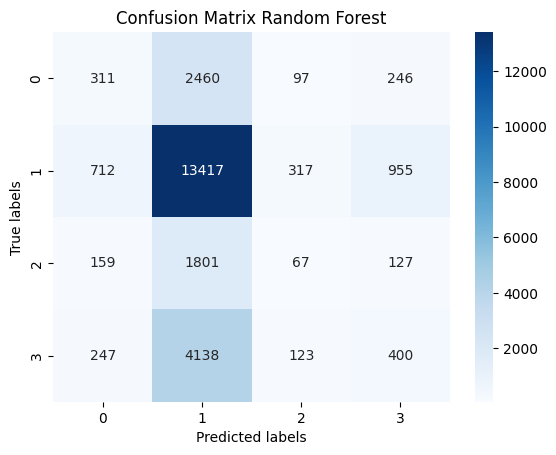

In [18]:
# Create heatmap using seaborn
sns.heatmap(cm_forest, annot=True, fmt='.0f', cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Random Forest")

# Show the plot
plt.show()

Heatmap for Naive Bayes

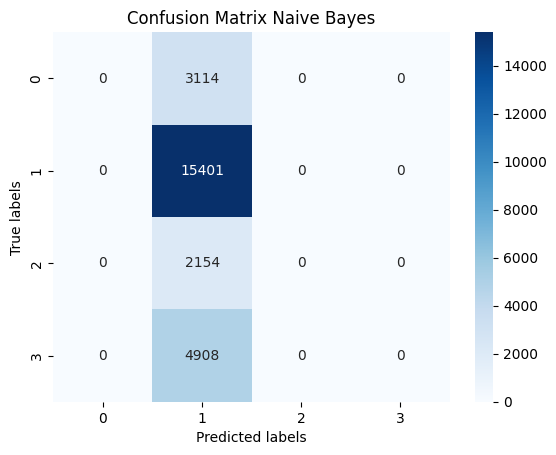

In [19]:
# Create heatmap using seaborn
sns.heatmap(cm_naive, annot=True, fmt='.0f', cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Naive Bayes")

# Show the plot
plt.show()

Heatmap for KNN

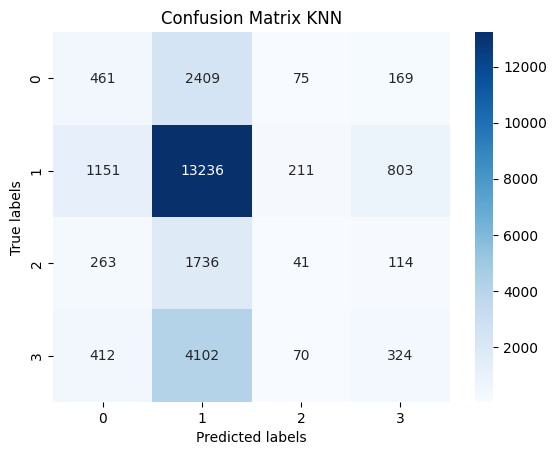

In [20]:
# Create heatmap using seaborn
sns.heatmap(cm_knn, annot=True, fmt='.0f', cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix KNN")

# Show the plot
plt.show()

Heatmap for Logistic Regression

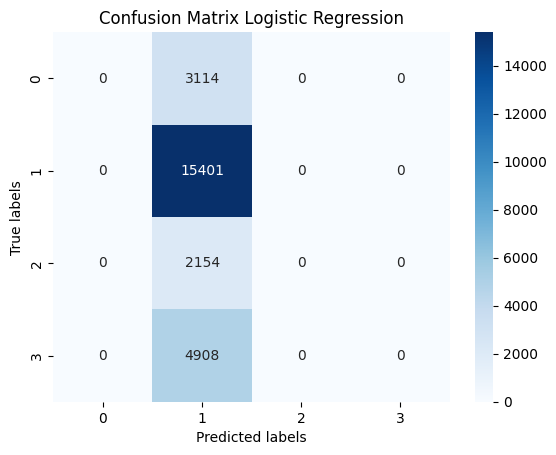

In [21]:
# Create heatmap using seaborn
sns.heatmap(cm_lr, annot=True, fmt='.0f', cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Logistic Regression")

# Show the plot
plt.show()

These are pretty interesting results. The way I look at it is that our classifiers took advantage that the majority of the sightings happen during the evening (when it is dark) and predominatly predicted most sightings happen during the evening regardless of the shape of the UFO, the location, and time of year the sighting was in. Besides the evening, there really was no other correlations. This result makes sense because this website is one such that anyone can report anything even if they are wrong with what they see. It is a very unreliable source to trust and it was fun to explore that there really is zero evidence suggesting paterns in UFOs.